In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('abalone.csv')
df.head()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [3]:
df.shape

(4177, 10)

In [4]:
df.isnull().sum()

sex           0
length        0
diameter      0
height        0
whole_wt      0
shucked_wt    0
viscera_wt    0
shell_wt      0
rings         0
age           0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

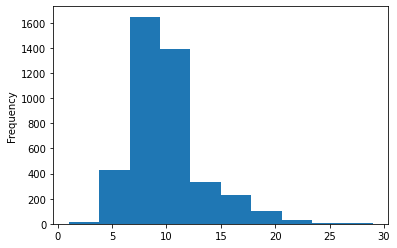

In [5]:
#visualizing the target

df.rings.plot(kind='hist')

#looks normal

In [6]:
df.dtypes

sex            object
length        float64
diameter      float64
height        float64
whole_wt      float64
shucked_wt    float64
viscera_wt    float64
shell_wt      float64
rings           int64
age           float64
dtype: object

In [7]:
df = pd.get_dummies(df)

In [8]:
df.head()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0,1,0


In [9]:
# The sum of the three 'sex' features is equal to length of the dataset. One of these features is redundant, and can be dropped. The two remaining features will be sufficient to explain the third.

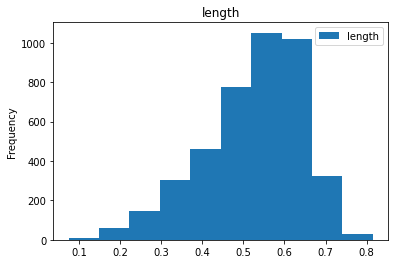

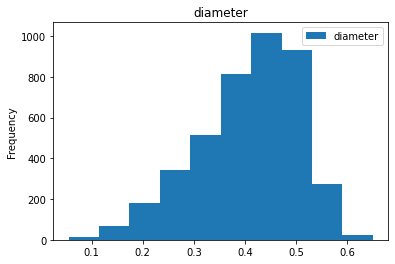

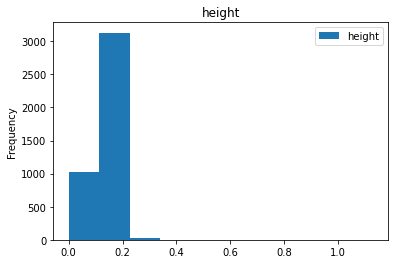

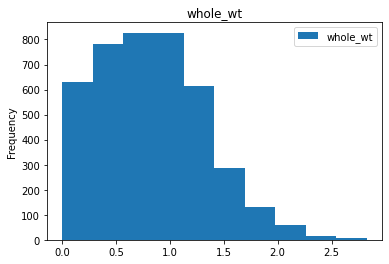

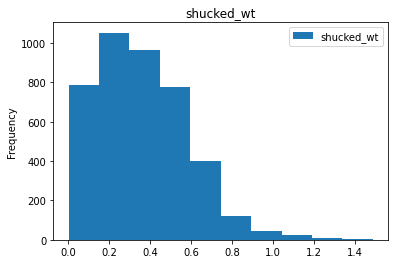

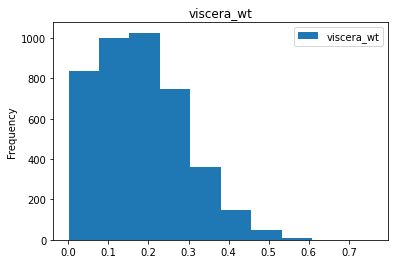

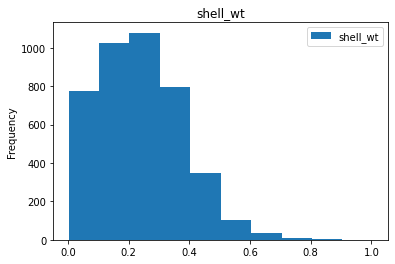

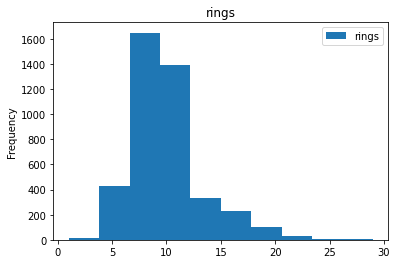

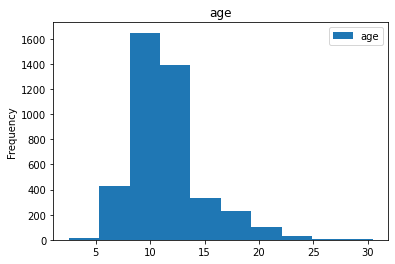

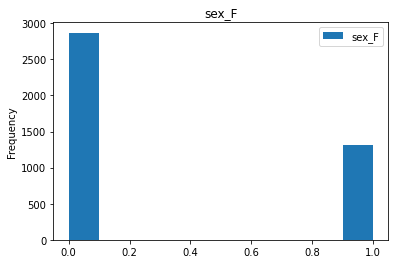

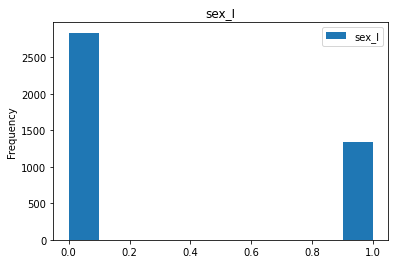

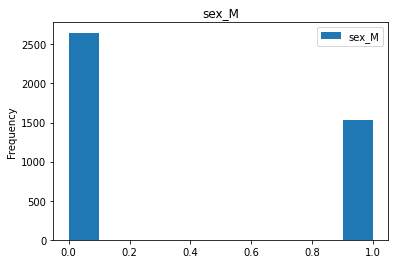

In [10]:
#univariate analysis

import matplotlib.pyplot as plt

for i in df.columns:
    df[i].plot(kind='hist', title=i)
    plt.legend()
    plt.show()
    
# other than height, all other features look normal

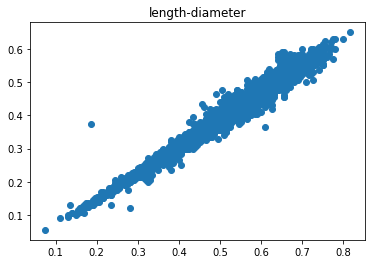

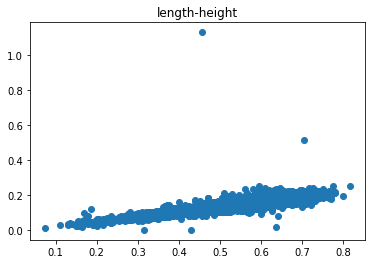

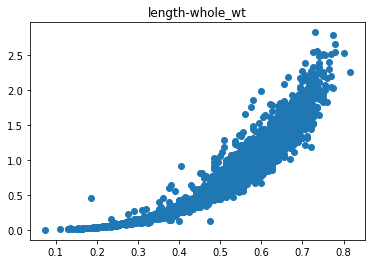

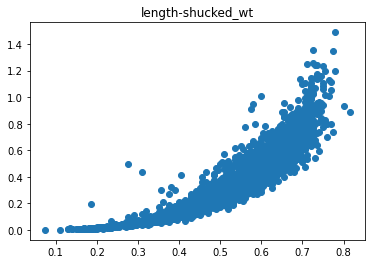

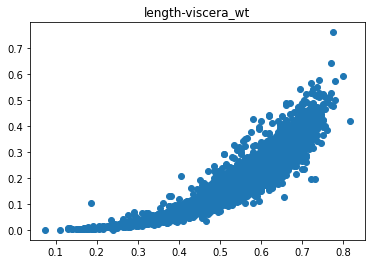

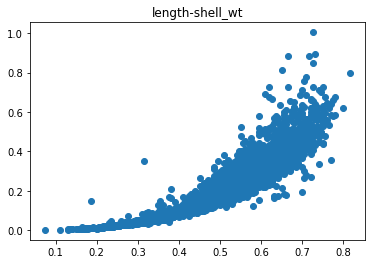

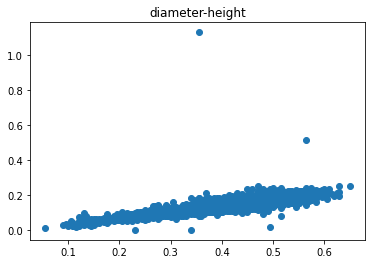

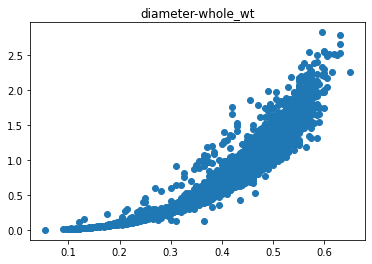

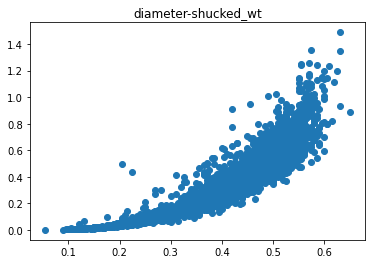

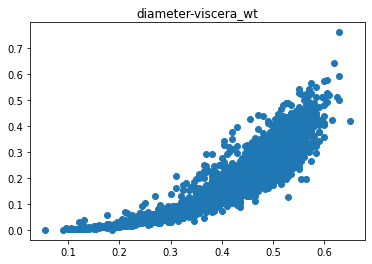

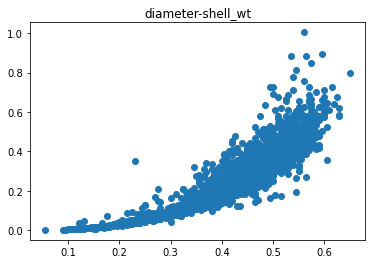

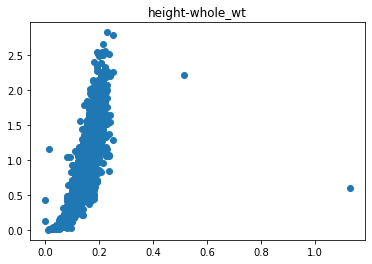

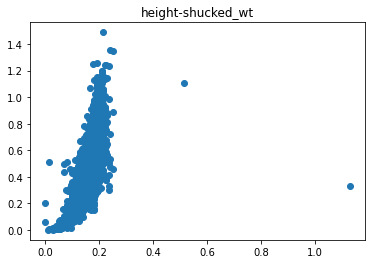

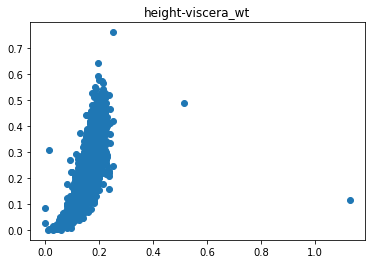

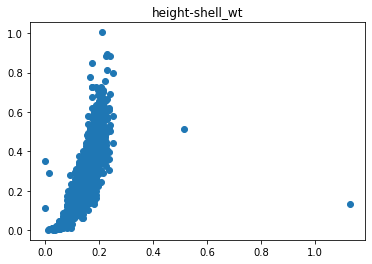

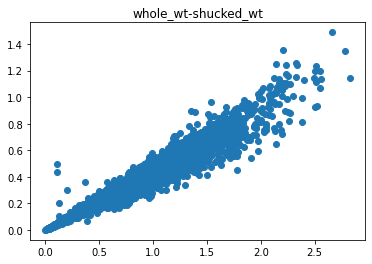

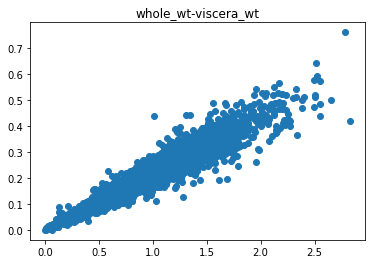

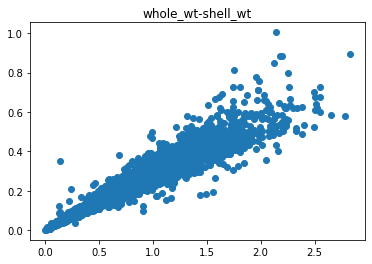

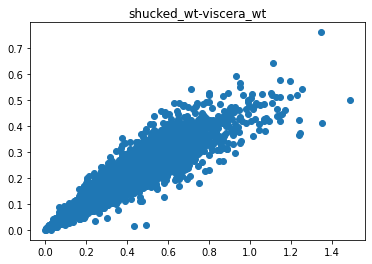

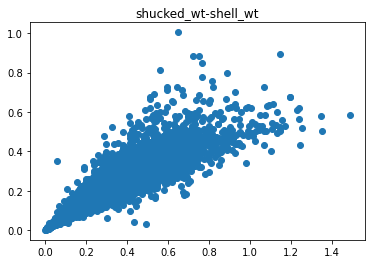

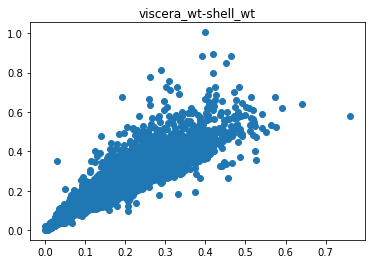

In [11]:
cols = list(df.iloc[:,:7].columns)
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)):
        plt.scatter(df[cols[i]], df[cols[j]])
        plt.title(cols[i]+'-'+cols[j])
        plt.show()
        
# most of the parameters have linear relationship except weight, hence tree algorithms will perform better than linear algorithms

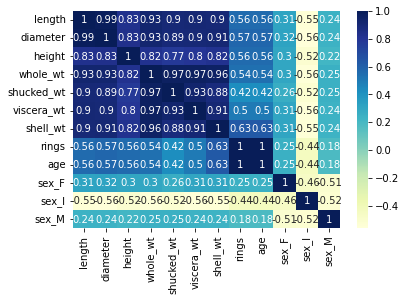

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [13]:
# rings is completely correlated with age, hence we can drop it while making the prediction model

In [14]:
df.drop('sex_I', axis=1, inplace=True)

In [15]:
# the data has varying scales, hence we need to scale the data

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df_scaled = mms.fit_transform(df)

In [16]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [17]:
df_scaled.head()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age,sex_F,sex_M
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000,0.500000,0.0,1.0
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286,0.214286,0.0,1.0
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714,0.285714,1.0,0.0
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429,0.321429,0.0,1.0
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286,0.214286,0.0,0.0


In [18]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop(['age'], axis = 1)
y = df_scaled['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [19]:
X_train.head()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,sex_F,sex_M
3823,0.729730,0.672269,0.119469,0.374358,0.317754,0.345622,0.271550,0.285714,1.0,0.0
3956,0.594595,0.571429,0.123894,0.242253,0.188299,0.164582,0.217738,0.392857,1.0,0.0
3623,0.790541,0.798319,0.154867,0.559943,0.496638,0.460829,0.402093,0.321429,0.0,1.0
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000,0.0,1.0
2183,0.567568,0.579832,0.137168,0.285638,0.157028,0.151415,0.347285,0.178571,0.0,1.0


In [20]:
y_train.head()

3823    0.285714
3956    0.392857
3623    0.321429
0       0.500000
2183    0.178571
Name: age, dtype: float64

In [21]:
from flaml import AutoML

automl_settings = {
    "time_budget": 60,
    "metric": 'mse',
    "task": 'regression'
}

automl = AutoML()
automl.fit(X_train = X_train, y_train = y_train, **automl_settings)

[flaml.automl: 09-15 23:22:47] {2565} INFO - task = regression
[flaml.automl: 09-15 23:22:47] {2567} INFO - Data split method: uniform
[flaml.automl: 09-15 23:22:47] {2570} INFO - Evaluation method: cv
[flaml.automl: 09-15 23:22:47] {2689} INFO - Minimizing error metric: mse
[flaml.automl: 09-15 23:22:47] {2831} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 09-15 23:22:47] {3133} INFO - iteration 0, current learner lgbm
[flaml.automl: 09-15 23:22:48] {3266} INFO - Estimated sufficient time budget=1353s. Estimated necessary time budget=10s.
[flaml.automl: 09-15 23:22:48] {3313} INFO -  at 0.2s,	estimator lgbm's best error=0.0066,	best estimator lgbm's best error=0.0066
[flaml.automl: 09-15 23:22:48] {3133} INFO - iteration 1, current learner lgbm
[flaml.automl: 09-15 23:22:48] {3313} INFO -  at 0.4s,	estimator lgbm's best error=0.0066,	best estimator lgbm's best error=0.0066
[flaml.automl: 09-15 23:22:48] {3133} INFO -

[flaml.automl: 09-15 23:23:00] {3133} INFO - iteration 36, current learner extra_tree
[flaml.automl: 09-15 23:23:01] {3313} INFO -  at 13.7s,	estimator extra_tree's best error=0.0001,	best estimator lgbm's best error=0.0000
[flaml.automl: 09-15 23:23:01] {3133} INFO - iteration 37, current learner lgbm
[flaml.automl: 09-15 23:23:02] {3313} INFO -  at 14.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 09-15 23:23:02] {3133} INFO - iteration 38, current learner lgbm
[flaml.automl: 09-15 23:23:02] {3313} INFO -  at 14.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 09-15 23:23:02] {3133} INFO - iteration 39, current learner lgbm
[flaml.automl: 09-15 23:23:02] {3313} INFO -  at 14.9s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 09-15 23:23:02] {3133} INFO - iteration 40, current learner lgbm
[flaml.automl: 09-15 23:23:03] {3313} INFO -  at 15.7s,	esti

[flaml.automl: 09-15 23:23:25] {3313} INFO -  at 37.6s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 09-15 23:23:25] {3133} INFO - iteration 75, current learner lgbm
[flaml.automl: 09-15 23:23:26] {3313} INFO -  at 38.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 09-15 23:23:26] {3133} INFO - iteration 76, current learner lgbm
[flaml.automl: 09-15 23:23:26] {3313} INFO -  at 39.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 09-15 23:23:26] {3133} INFO - iteration 77, current learner extra_tree
[flaml.automl: 09-15 23:23:27] {3313} INFO -  at 39.7s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 09-15 23:23:27] {3133} INFO - iteration 78, current learner extra_tree
[flaml.automl: 09-15 23:23:28] {3313} INFO -  at 40.2s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best err

[flaml.automl: 09-15 23:23:45] {3133} INFO - iteration 111, current learner extra_tree
[flaml.automl: 09-15 23:23:46] {3313} INFO -  at 58.6s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000
[flaml.automl: 09-15 23:23:46] {3133} INFO - iteration 112, current learner extra_tree
[flaml.automl: 09-15 23:23:46] {3313} INFO -  at 59.1s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000
[flaml.automl: 09-15 23:23:46] {3133} INFO - iteration 113, current learner extra_tree
[flaml.automl: 09-15 23:23:47] {3313} INFO -  at 59.4s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000
[flaml.automl: 09-15 23:23:47] {3133} INFO - iteration 114, current learner extra_tree
[flaml.automl: 09-15 23:23:47] {3313} INFO -  at 60.0s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000
[flaml.automl: 09-15 23:23:47] {3133} INFO - iteration 115, current learner 

In [28]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
model = rfr.fit(X_train, y_train)

In [29]:
y_pred = automl.predict(X_test)

In [30]:
pred = pd.DataFrame(y_pred)

In [31]:
pred

,0
0,0.285714
1,0.250000
2,0.535714
3,0.285714
4,0.464286
...,...
1040,0.392857
1041,0.285714
1042,0.250000
1043,0.285714


In [32]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, y_test)

3.729562000238836e-07